<a href="https://colab.research.google.com/github/taniahdez75/st/blob/main/Copy_of_Outliers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df = sns.load_dataset ("diamonds")

In [ ]:
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   carat    53940 non-null  float64 
 1   cut      53940 non-null  category
 2   color    53940 non-null  category
 3   clarity  53940 non-null  category
 4   depth    53940 non-null  float64 
 5   table    53940 non-null  float64 
 6   price    53940 non-null  int64   
 7   x        53940 non-null  float64 
 8   y        53940 non-null  float64 
 9   z        53940 non-null  float64 
dtypes: category(3), float64(6), int64(1)
memory usage: 3.0 MB


In [ ]:
df = df.dropna()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   carat    53940 non-null  float64 
 1   cut      53940 non-null  category
 2   color    53940 non-null  category
 3   clarity  53940 non-null  category
 4   depth    53940 non-null  float64 
 5   table    53940 non-null  float64 
 6   price    53940 non-null  int64   
 7   x        53940 non-null  float64 
 8   y        53940 non-null  float64 
 9   z        53940 non-null  float64 
dtypes: category(3), float64(6), int64(1)
memory usage: 3.4 MB


# Tukey Method (IQR)

In [ ]:
df['table']

0        55.0
1        61.0
2        65.0
3        58.0
4        58.0
         ... 
53935    57.0
53936    55.0
53937    60.0
53938    58.0
53939    55.0
Name: table, Length: 53940, dtype: float64

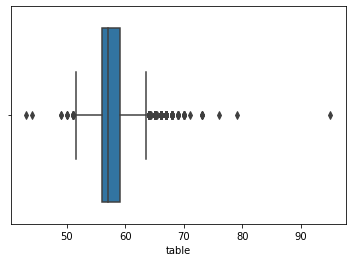

In [ ]:
sns.boxplot(x=df['table'])
plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


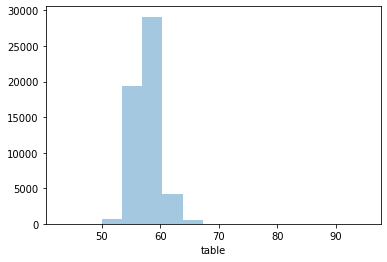

In [ ]:
sns.distplot(df['table'],bins=15,kde=False)
plt.show()

In [ ]:
df[['table']].describe()

,table
count,53940.000000
mean,57.457184
std,2.234491
min,43.000000
25%,56.000000
50%,57.000000
75%,59.000000
max,95.000000


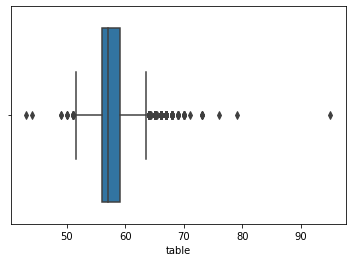

In [ ]:
sns.boxplot(x=df['table'])
plt.show()

In [ ]:
Q1 = df['table'].quantile(0.25)

In [ ]:
Q3 = df['table'].quantile(0.75)

In [ ]:
IQR = Q3 - Q1
IQR

3.0

In [ ]:
lower_lim = Q1 - 1.5 * IQR
lower_lim

51.5

In [ ]:
upper_lim = Q3 + 1.5 * IQR
upper_lim

63.5

In [ ]:
# Dropping Outliers
outlier_15_low = (df['table'] < lower_lim)
outlier_15_up = (df['table'] > upper_lim)

In [ ]:
len(df['table'])  # number of values total in this feature

53940

In [ ]:
n_total = len(df['table'])
n_outliers = len(df['table'][outlier_15_low]) + len(df['table'][outlier_15_up])
n_valid = n_total - n_outliers
n_valid

53335

In [ ]:
df['table'][(outlier_15_low | outlier_15_up)]  # example records that are outliers

2        65.0
91       69.0
145      64.0
219      64.0
227      67.0
         ... 
53695    65.0
53697    65.0
53756    64.0
53757    64.0
53785    65.0
Name: table, Length: 605, dtype: float64

In [ ]:
df['table'][~(outlier_15_low | outlier_15_up)]  # all of the records that are NOT outliers

0        55.0
1        61.0
3        58.0
4        58.0
5        57.0
         ... 
53935    57.0
53936    55.0
53937    60.0
53938    58.0
53939    55.0
Name: table, Length: 53335, dtype: float64

In [ ]:
df = df[~(outlier_15_low | outlier_15_up)] 

In [ ]:
df

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
5,0.24,Very Good,J,VVS2,62.8,57.0,336,3.94,3.96,2.48
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2657: RuntimeWarning: Mean of empty slice.
  line, = ax.plot(a.mean(), 0)
/usr/local/lib/python3.8/dist-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/usr/local/lib/python3.8/dist-packages/numpy/lib/histograms.py:906: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges


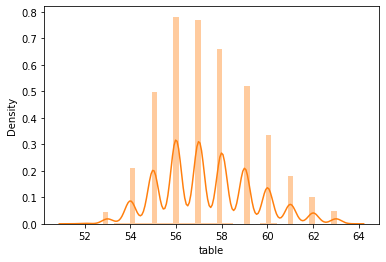

In [ ]:
# copyright:  Eladio Mendez
outliers = df['table'][(outlier_15_low | outlier_15_up)]
valid_data = df['table'][~(outlier_15_low | outlier_15_up)]

sns.distplot(outliers, label='Outliers')
sns.distplot(valid_data, label='Valid Data')

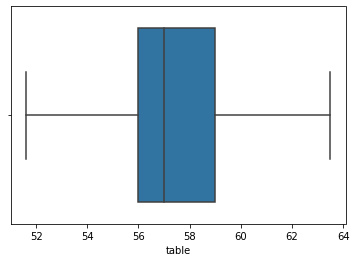

In [ ]:
sns.boxplot(x = df['table'])
plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


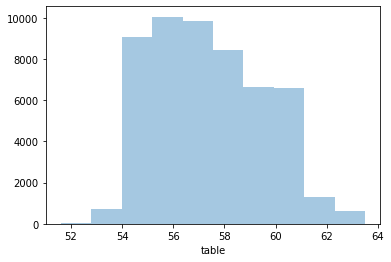

In [ ]:
sns.distplot(df['table'],bins=10,kde=False)
plt.show()

# Winsorize Method

In [ ]:
df = sns.load_dataset ("diamonds")

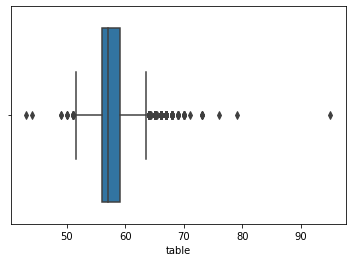

In [ ]:
sns.boxplot(x = df['table'])
plt.show()

In [ ]:
from scipy.stats.mstats import winsorize
upper_lim

63.5

In [ ]:
lower_lim

51.5

In [ ]:
df['table'].quantile(0.01)


53.0

In [ ]:
df['table'].quantile(0.98)

63.0

In [ ]:
# how do we treat outliers with the winsorization method
df_table_win = winsorize(df['table'],(0.01,0.02))  # lower boundary 1% - upper boundary 1-0.02 or 98th percentile or higher

In [ ]:
df_table_win

masked_array(data=[55., 61., 63., ..., 60., 58., 55.],
             mask=False,
       fill_value=1e+20)

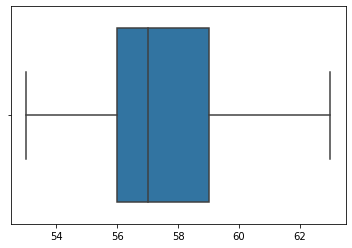

In [ ]:
sns.boxplot(x=df_table_win)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


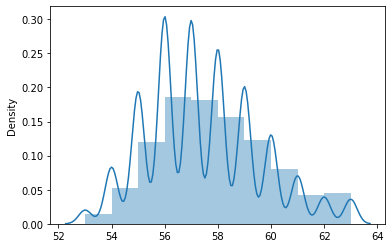

In [ ]:
sns.distplot(df_table_win,bins=10,kde=True)

In [ ]:
df_table_win = pd.DataFrame(df_table_win)[0]
df_table_win.describe()

count    53940.000000
mean        57.434607
std          2.142774
min         53.000000
25%         56.000000
50%         57.000000
75%         59.000000
max         63.000000
Name: 0, dtype: float64

# Log Transformations

In [ ]:
df = sns.load_dataset ("diamonds")
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [ ]:
df['carat'].head()

0    0.23
1    0.21
2    0.23
3    0.29
4    0.31
Name: carat, dtype: float64

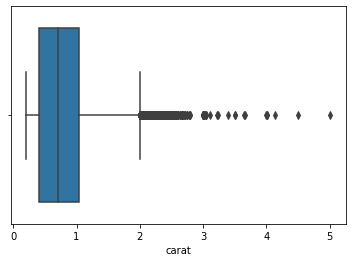

In [ ]:
sns.boxplot(x=df['carat'])

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


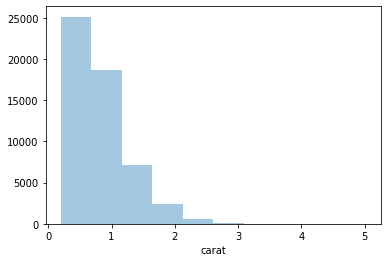

In [ ]:
sns.distplot(df['carat'],bins=10,kde=False)

In [ ]:
import numpy as np
df_carat_log = np.log(df['carat'])

In [ ]:
df['carat'].head()

0    0.23
1    0.21
2    0.23
3    0.29
4    0.31
Name: carat, dtype: float64

In [ ]:
df_carat_log.head()

0   -1.469676
1   -1.560648
2   -1.469676
3   -1.237874
4   -1.171183
Name: carat, dtype: float64

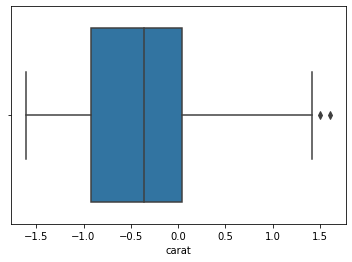

In [ ]:
sns.boxplot(x=df_carat_log)

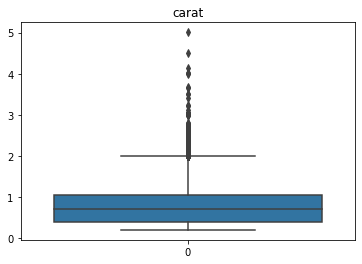

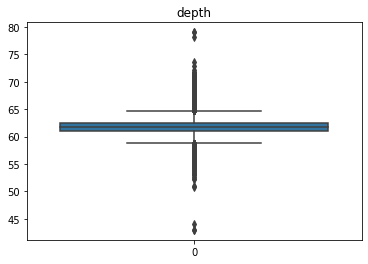

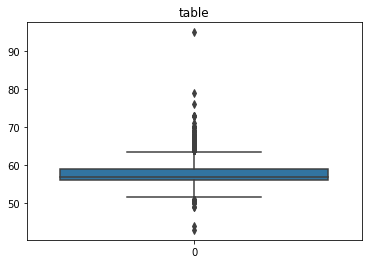

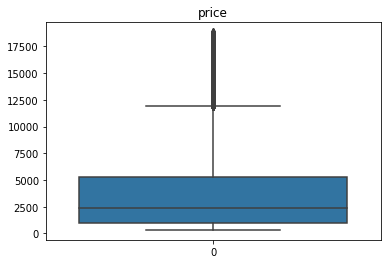

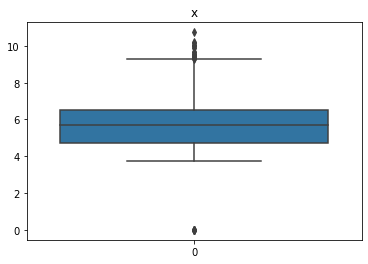

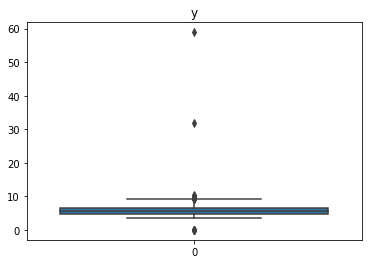

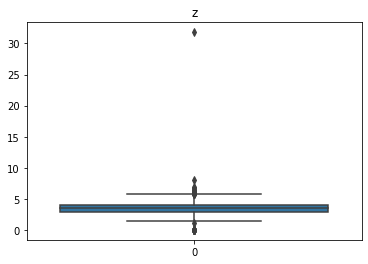

In [ ]:
# iterate over the columns in the DataFrame and plot a boxplot for each column
numeric_cols = df.select_dtypes(include=['number']).columns

# create a new DataFrame with only numeric columns
df_numeric = df[numeric_cols]

for col in df_numeric.columns:
    sns.boxplot(data=df[col])
    plt.title(col)
    plt.show()